In [84]:
# IMPORTING THE PACKAGES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [85]:
# LOADING THE TRAINING DATASET
train = pd.read_csv('train.tsv',sep ='\t')
train.head(5)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [86]:
# LOADING THE TEST DATASET
test = pd.read_csv('test.tsv',sep ='\t')
test.head(5)

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


Text(0, 0.5, 'Number of Reviews')

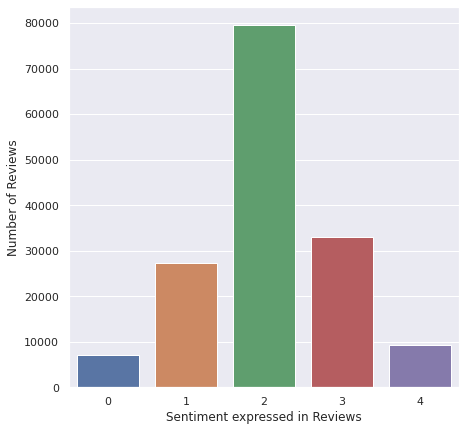

In [87]:
# COUNT OF PHRASES BASED ON SENTIMENTS
sns.countplot(train['Sentiment'])
plt.xlabel('Sentiment expressed in Reviews')
plt.ylabel('Number of Reviews')

In [88]:
# SETTING SENTIMENT LABELS
def label(train):
        if train['Sentiment'] == 0:
            return 'negative'
        elif train['Sentiment'] == 1:
            return 'somewhat negative'
        elif train['Sentiment']==2:
            return 'neutral'
        elif train['Sentiment']==3:
            return 'somewhat positive'
        else:
            return 'positive'

train['Label'] = train.apply(label,axis=1)
train.head(5)

,PhraseId,SentenceId,Phrase,Sentiment,Label
0,1,1,A series of escapades demonstrating the adage ...,1,somewhat negative
1,2,1,A series of escapades demonstrating the adage ...,2,neutral
2,3,1,A series,2,neutral
3,4,1,A,2,neutral
4,5,1,series,2,neutral


In [89]:
# CHECKING FOR NULL VALUES
train.isnull().sum()

PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
Label         0
dtype: int64

In [90]:
# TF_IDF VECTORIZER
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import TweetTokenizer

tokenizer = TweetTokenizer()

vectorizer = TfidfVectorizer(ngram_range=(1, 3), tokenizer=tokenizer.tokenize)
full_text = list(train['Phrase'].values) + list(test['Phrase'].values)

vectorizer.fit(full_text)
train_vectorized = vectorizer.transform(train['Phrase'])
test_vectorized = vectorizer.transform(test['Phrase'])

In [91]:
# SPLITTING TRAINING AND TEST DATA
from sklearn.model_selection import train_test_split
X = train_vectorized
y = train['Sentiment']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [92]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
logreg = LogisticRegression(multi_class='ovr', solver='sag', random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc = accuracy_score(y_pred, y_test)
lgacc = acc
print('Accuracy: ', acc)
print('\nConfusion Matrix')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report\n')
print(classification_report(y_test, y_pred))

Accuracy:  0.6250160194796873

Confusion Matrix
[[  339   913   826    26     3]
 [  152  2588  5306   155     4]
 [   25   925 21737  1080    23]
 [    2   117  5493  4016   253]
 [    0    18   661  1574   582]]

Classification Report

              precision    recall  f1-score   support

           0       0.65      0.16      0.26      2107
           1       0.57      0.32      0.41      8205
           2       0.64      0.91      0.75     23790
           3       0.59      0.41      0.48      9881
           4       0.67      0.21      0.31      2835

    accuracy                           0.63     46818
   macro avg       0.62      0.40      0.44     46818
weighted avg       0.62      0.63      0.59     46818



In [93]:
# K-NEAREST NEIGHBOUR CLASSIFIER
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_pred, y_test)
knnacc = acc
print('Accuracy: ', acc)
print('\nConfusion Matrix')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report\n')
print(classification_report(y_test, y_pred))

Accuracy:  0.5866760647614165

Confusion Matrix
[[  845   922   314    25     1]
 [  950  4157  2829   248    21]
 [  574  3294 17066  2621   235]
 [   66   561  4058  4562   634]
 [   10    62   569  1357   837]]

Classification Report

              precision    recall  f1-score   support

           0       0.35      0.40      0.37      2107
           1       0.46      0.51      0.48      8205
           2       0.69      0.72      0.70     23790
           3       0.52      0.46      0.49      9881
           4       0.48      0.30      0.37      2835

    accuracy                           0.59     46818
   macro avg       0.50      0.48      0.48     46818
weighted avg       0.58      0.59      0.58     46818



In [94]:
# LINEAR SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
svc = LinearSVC(multi_class='ovr', random_state=42)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc = accuracy_score(y_pred, y_test)
svcacc = acc
print('Accuracy: ', acc)
print('\nConfusion Matrix')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report\n')
print(classification_report(y_test, y_pred))

Accuracy:  0.6516724336793541

Confusion Matrix
[[  779   985   322    20     1]
 [  657  4082  3265   191    10]
 [  145  1971 19398  2170   106]
 [   14   206  3649  5099   913]
 [    2    13   203  1465  1152]]

Classification Report

              precision    recall  f1-score   support

           0       0.49      0.37      0.42      2107
           1       0.56      0.50      0.53      8205
           2       0.72      0.82      0.77     23790
           3       0.57      0.52      0.54      9881
           4       0.53      0.41      0.46      2835

    accuracy                           0.65     46818
   macro avg       0.57      0.52      0.54     46818
weighted avg       0.64      0.65      0.64     46818



In [95]:
# MULTINOMIAL NAIVE BAYES
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
acc = accuracy_score(y_pred, y_test)
nbacc = acc
print('Accuracy:', acc)
print('\nConfusion Matrix')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report\n')
print(classification_report(y_test, y_pred))

Accuracy: 0.5933401683113333

Confusion Matrix
[[   45   719  1334     9     0]
 [   15  1770  6336    84     0]
 [    1   556 22298   933     2]
 [    0    52  6255  3545    29]
 [    0     5  1102  1607   121]]

Classification Report

              precision    recall  f1-score   support

           0       0.74      0.02      0.04      2107
           1       0.57      0.22      0.31      8205
           2       0.60      0.94      0.73     23790
           3       0.57      0.36      0.44      9881
           4       0.80      0.04      0.08      2835

    accuracy                           0.59     46818
   macro avg       0.66      0.32      0.32     46818
weighted avg       0.61      0.59      0.53     46818



In [96]:
# PREDICTING TEST SET USING LOGISTIC REGRESSION
logreg_pred = logreg.predict(test_vectorized)
results = pd.DataFrame()
results['PhraseId'] = test.PhraseId
results['Sentiment'] = logreg_pred
results.to_csv('Results (Logistic Regression).csv',index=False)

In [97]:
# PREDICTING TEST SET USING KNN
knn_pred = knn.predict(test_vectorized)
results = pd.DataFrame()
results['PhraseId'] = test.PhraseId
results['Sentiment'] = knn_pred
results.to_csv('Results (KNN).csv',index=False)

In [98]:
# PREDICTING TEST SET USING LINEAR SVC
svc_pred = svc.predict(test_vectorized)
results = pd.DataFrame()
results['PhraseId'] = test.PhraseId
results['Sentiment'] = svc_pred
results.to_csv('Results (Linear SVC).csv',index=False)

In [99]:
# PREDICTING TEST SET USING MULTINOMIAL NAIVE BAYES
nb_pred = nb.predict(test_vectorized)
results = pd.DataFrame()
results['PhraseId'] = test.PhraseId
results['Sentiment'] = nb_pred
results.to_csv('Results (Multinomial NB).csv',index=False)

The accuracy score achieved using Logistic Regression is: 0.6250160194796873 %
The accuracy score achieved using KNN is: 0.5866760647614165 %
The accuracy score achieved using Linear SVC is: 0.6516724336793541 %
The accuracy score achieved using Multinomial NB is: 0.5933401683113333 %


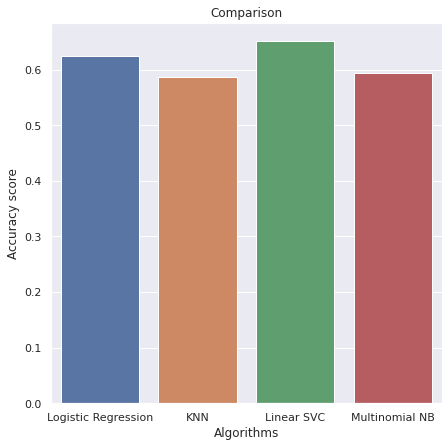

In [100]:
# COMPARING ALL THE MODELS
scores = [lgacc,knnacc,svcacc,nbacc]
algorithms = ["Logistic Regression","KNN","Linear SVC","Multinomial NB"]
for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")
sns.set(rc={'figure.figsize':(7,7)})
plt.title("Comparison")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(algorithms,scores)